## 컨브넷 학습 시각화
- 시각적인 개념을 학습한 것이기 때문에 시각화하기 아주 좋음
- 사용이 편한 3가지 기법
    1. 컨브넷 중간층의 출력(중간층에 있는 활성화)을 시각화하기
        - 연속된 컨브넷 층이 입력을 어떻게 변형시키는지 이해하고 컨브넷 필터의 의미를 파악하는데 도움이 된다
    2. 컨브넷 필터를 시각화 하기
        - 컨브넷 필터가 찾으려는 시각적인 패턴과 개념이 무엇인지 상세하게 이해하는데 도움이 된다.
    3. 클래스 활성화에 대한 히트맵을 이미지에 시각화하기
        - 이미지의 어느 부분이 주어진 클래스에 속하는데 기여했는지 이해하고, 이미지에서 객체 위치를 추정하는데 도움이 된다.

In [6]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [3]:
img_path = 'datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array((img))
img_tensor = np.expand_dims(img_tensor, axis=0) # 이미지를 4D 텐서로 변경해준다  (samples, width, height, depth)
img_tensor /= 255. # 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용한다

print(img_tensor.shape)

Using TensorFlow backend.


(1, 150, 150, 3)


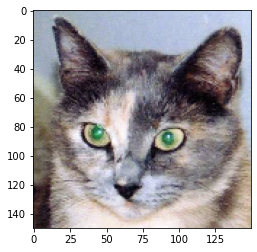

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

### 입력 텐서와 출력 텐서의 리스트로 모델 인스턴스 만들기

In [7]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]] # 상위 8개 층의 출력을 추출한다
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)


# 예측 모드로 모델 실행하기
activations = activation_model.predict(img_tensor) # 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환한다


In [9]:
# 예를들어 다음 고양이 이미지에 대한 첫 번쨰 합성곱 층의 활성화 값
first_layer_activation = activations[0]
print(first_layer_activation)



[[[[0.00000000e+00 1.24712378e-01 0.00000000e+00 ... 4.73155349e-01
    2.54302979e-01 3.09352856e-03]
   [0.00000000e+00 1.33688226e-01 0.00000000e+00 ... 4.76256460e-01
    2.58028954e-01 6.97566289e-03]
   [0.00000000e+00 1.22661456e-01 0.00000000e+00 ... 4.72070545e-01
    2.43707001e-01 2.14244053e-02]
   ...
   [0.00000000e+00 1.65650114e-01 0.00000000e+00 ... 6.12346232e-01
    3.26247752e-01 1.02751460e-02]
   [0.00000000e+00 1.74702331e-01 0.00000000e+00 ... 6.13493860e-01
    3.23979288e-01 1.30563527e-02]
   [0.00000000e+00 1.72247961e-01 0.00000000e+00 ... 6.14575088e-01
    3.24358881e-01 1.59245171e-02]]

  [[0.00000000e+00 1.25785738e-01 0.00000000e+00 ... 4.66547310e-01
    2.44435221e-01 3.57669778e-03]
   [0.00000000e+00 1.35005698e-01 0.00000000e+00 ... 4.69906121e-01
    2.48331487e-01 8.16569384e-03]
   [0.00000000e+00 1.29239738e-01 0.00000000e+00 ... 4.75226283e-01
    2.47065216e-01 1.75967179e-02]
   ...
   [0.00000000e+00 1.66965604e-01 0.00000000e+00 ... 6.12

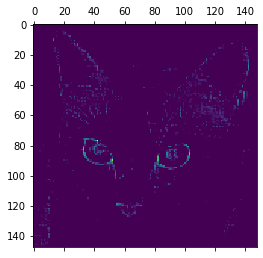

In [10]:
# 사진에서 첫 번쨰 층의 활성화 중 20번째 채널
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis') 

<ipython-input-29-b654430ae236>:22: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 368. TiB for an array with shape (85525504, 591872) and data type float64

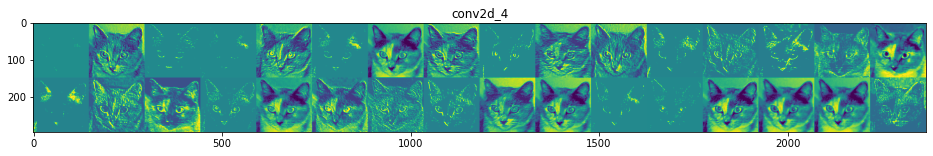

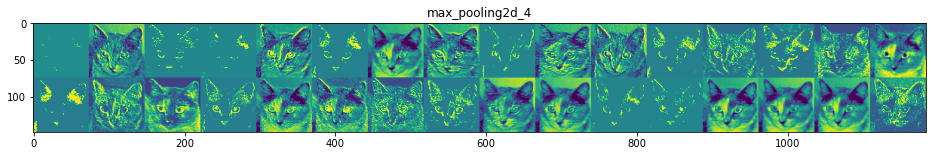

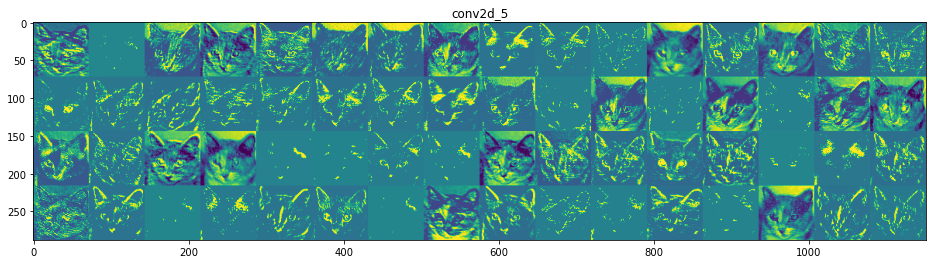

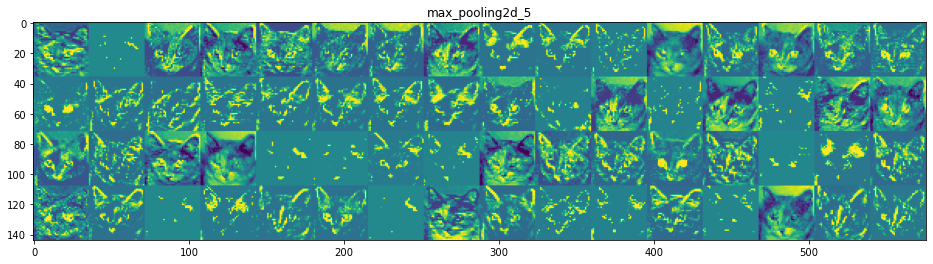

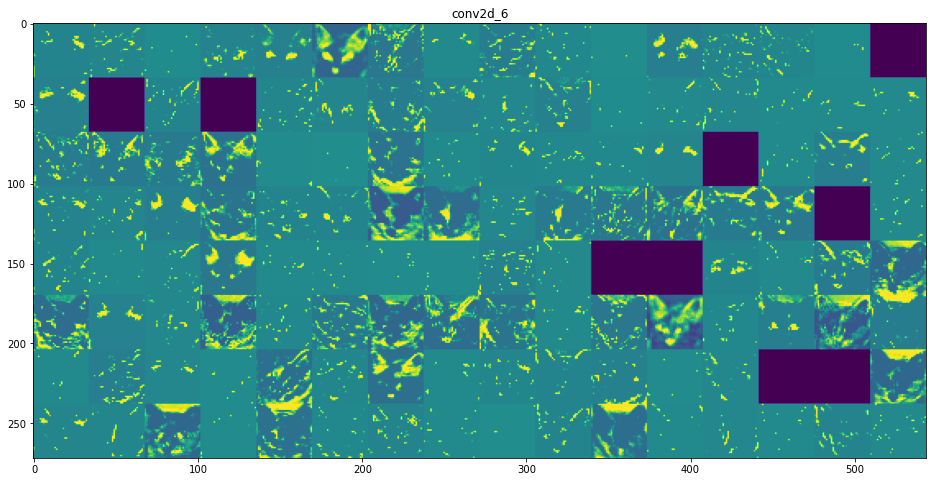

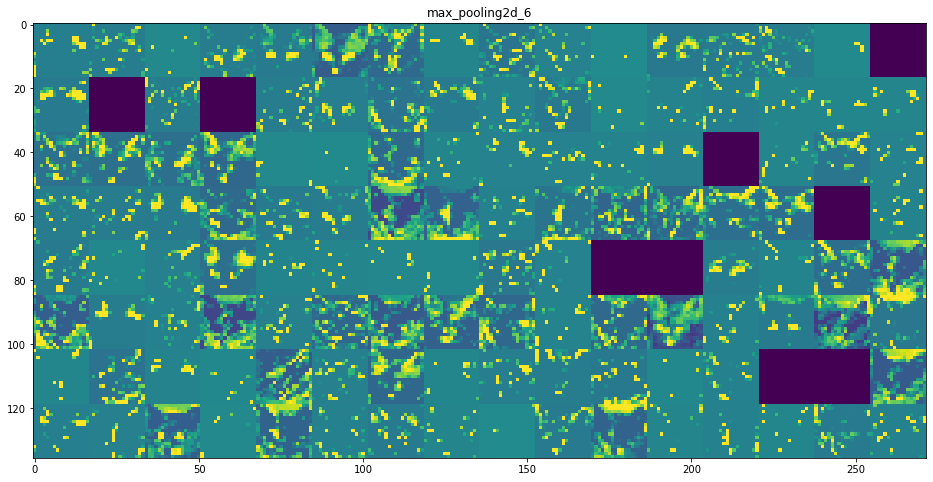

In [29]:
# 모든 활성화 층 그리기

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # 특성 맵 그리기
    n_features = layer_activation.shape[-1] # 특성맵에 있는 특성 수 

    size = layer_activation.shape[1] # 특성맵의 크기는 (1, size, size, n_features)

    n_cols = n_features // images_per_row # 활성화 채널을 위한 그리드 크기 구하기
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :,
                                            col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col+1) * size,
                        row * size : (row+1) * size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()
